## 1. Excercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Robot arm parameters
L1 = 5
L2 = 3
target = (6, 4)

In [2]:
def fitness(angles):
    thetha1, thetha2 = np.radians(angles)
    
    x = L1 * np.cos(thetha1) + L2 * np.cos(thetha1 + thetha2)
    y = L1 * np.sin(thetha1) + L2 * np.sin(thetha1 + thetha2)
    
    return np.sqrt((x - target[0]) ** 2 + (y - target[1]) ** 2)

In [3]:
def init_population(pop_size):
    return np.random.uniform(0, 180, (pop_size, 2))

In [4]:
def selection(population, fitness_value, num_parents):
    parents_idx = np.argsort(fitness_value)[:num_parents]
    return population[parents_idx]

In [5]:
def crossover(parents, pop_size):
    offspring = []
    while len(offspring) < pop_size:
        parent1, parent2 = random.sample(parents.tolist(), 2)
        crossover_point = random.randint(0, 1)
        child = [parent1[0], parent2[1]] if crossover_point == 0 else [parent2[0], parent1[1]]
        offspring.append(child)
    return np.array(offspring)

In [6]:
def mutation(offspring, mutation_rate):
    for child in offspring:
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, 1)
            child[mutation_point] += np.random.uniform(-10, 10)
            child[mutation_point] = np.clip(child[mutation_point], 0, 180)
    return offspring

In [7]:
def algorithm(pop_size, num_generations, mutation_rate):
    population = init_population(pop_size)
    best_fitness_list = []
    for generation in range(num_generations):
        fitness_value = np.array([fitness(ind) for ind in population])
        best_fitness = np.min(fitness_value)
        best_fitness_list.append(best_fitness)
        
        # selection
        parents = selection(population, fitness_value, pop_size//2)
        
        # crossover
        offspring = crossover(parents, pop_size)
        
        # mutation
        offspring = mutation(offspring, mutation_rate)
        
        population = offspring
        
        print(f"Generation {generation}: Best fitness = {best_fitness}")
    
    return best_fitness_list, population

Generation 0: Best fitness = 2.148575881336733
Generation 1: Best fitness = 1.5630173693461604
Generation 2: Best fitness = 1.0166630379090336
Generation 3: Best fitness = 0.6784381534410067
Generation 4: Best fitness = 1.3525739897339741
Generation 5: Best fitness = 0.7820655970012041
Generation 6: Best fitness = 1.0166630379090336
Generation 7: Best fitness = 1.0166630379090336
Generation 8: Best fitness = 0.919137116311575
Generation 9: Best fitness = 0.919137116311575
Generation 10: Best fitness = 0.919137116311575
Generation 11: Best fitness = 0.919137116311575
Generation 12: Best fitness = 0.9279461786384025
Generation 13: Best fitness = 0.7544051613917471
Generation 14: Best fitness = 0.7544051613917471
Generation 15: Best fitness = 0.6635344412124169
Generation 16: Best fitness = 0.6668341580558732
Generation 17: Best fitness = 0.6141405862585847
Generation 18: Best fitness = 0.6635344412124169
Generation 19: Best fitness = 0.6477328402483193
Generation 20: Best fitness = 0.643

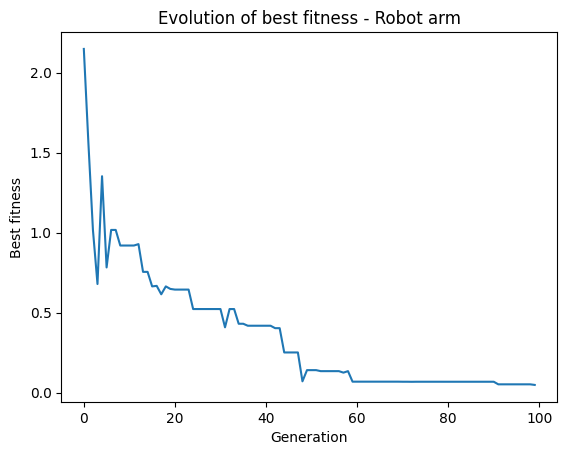

Best individual: [13.63503216 53.98001678]
Best fitness value: 0.047405900151050034


In [8]:
pop_size = 30
num_generations = 100
mutation_rate = 0.1

best_fitness_list, population = algorithm(pop_size, num_generations, mutation_rate)

plt.plot(best_fitness_list)
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.title("Evolution of best fitness - Robot arm")
plt.show()

# best fitness value
final_fitness_value = np.array([fitness(i) for i in population])
best_individual = population[np.argmin(final_fitness_value)]

print("Best individual:", best_individual)
print("Best fitness value:", np.min(final_fitness_value))